<a href="https://colab.research.google.com/github/JulioCSBpy/Dataset_Churn/blob/main/Projeto%201%20-%20Uniasselvi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Projeto I - Aplicação de Métodos de Aprendizagem de Máquina

Júlio Cézar de Souza Barbosa (1904612)

Rickson das Neves Tavares (2072486)

# Avaliação 1 - Introdução e Fundamentação Teórica (Primeira parte): Descrição do Problema

### Redução de Churn com Machine Learning

Um dos maiores problemas de parte das empresas é a ocorrência de Churn, ou seja, perda de clientes.
Aquisição de novos clientes custa mais caro do que manter os já existentes.
Churn é a perda de cliente ou cancelamento de serviço, é quando o cliente corta o relacionamento com a empresa.
Essa desistência pode ser pela insatisfação do produto, mau atendimento, óbito, quebra de contrato, dentre outros.

### Objetivo

Esse projeto tem como objetivo aplicar algoritmos de machine learning para prever e identificar as características dos clientes com risco de Churn.

### Especificação Técnica

Dataset: Para desenvolvimento desse projeto, será utilizado o dataset chamado Churn_Modelling que contém dados de clientes de uma agência bancária, disponível em: < https://www.kaggle.com/shubh0799/churn-modelling?select=Churn_Modelling.csv >.

Formato: A base de dados está em formato CSV, estando divivida em 14(catorze) colunas, conforme abaixo:

RowNumber:       número da linha

CustomerId:      identificação do cliente;

Surname:         sobrenome do cliente;

CreditScore:     pontuação de credito, 0 alto risco de inadimplência e 10000 clientes com baixo risco de inadimplência;

Geography:       país que o serviço é oferecido;

Gender:          sexo do cliente;

Age:             idade do cliente;

Tenure:          um indicativo de estabilidade no emprego, em que 0 significa pouca estabilidade e 10 muita estabilidade.

Balance:         saldo da conta corrente;

NumOfProducts:   número de produtos bancários adquiridos;

HasCrCard:       se tem cartão de credito ou não, (Sim = 1 e Não = 0);

IsActiveMember:  se é um cliente com conta ativa, (Ativo = 1) ;

EstimatedSalary: salário estimado;

Exited:          cliente deixou de ser cliente do banco ou não (Churn = 1).


Métodos de Pŕe-processamento: Limpeza da base, verificação e remoção de dados faltantes, remoção de colunas irrelevantes, verificação e separação de variáveis dependentes e independentes, como uma forma de otimizar o desempenho dos algoritmos.

Tarefa de Aprendizado: Será aplicado a tarefa de Classificação.

Métricas de Avaliação: Matriz de Confusão: Acurácia, F1-Score, Recall, Precision.

Algoritmos Avaliados: Para prever os clientes em risco de Churn iremos utilizar o modelo KNN, Random Forest e XGBost.

# Avaliação 2 - Metodologia, Resultados e Discussão (Segunda parte): Preparação dos Dados

### Importando os dados

In [1]:
#Importando a biblioteca Pandas
import pandas as pd

In [2]:
#Importando o dataset
url= "https://raw.githubusercontent.com/JulioCSBpy/Dataset_Churn/main/dataset/Churn_Modelling.csv"
dados = pd.read_csv(url)

In [3]:
#Visualizando as 10 primeiras linhas do dataset
dados.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
#Renomeando as colunas
dados.columns = ['N°', 'ID_Cliente', 'Sobrenome', 'Pontuação', 'País', 'Gênero', 'Idade', 'Estabilidade', 'Saldo', 
                'N°_de_Produtos', 'Possui_Cartão', 'Tem_Conta_Ativa', 'Salário', 'Churn']

In [5]:
#Visualizando as 10 últimas linhas do dataset
dados.tail(10)

,N°,ID_Cliente,Sobrenome,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
9990,9991,15798964,Nkemakonam,714,Germany,Male,33,3,35016.60,1,1,0,53667.08,0
9991,9992,15769959,Ajuluchukwu,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9992,9993,15657105,Chukwualuka,726,Spain,Male,36,2,0.00,1,1,0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28,7,155060.41,1,1,0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29,2,0.00,2,0,0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


### Identificando as váriaveis

In [6]:
#Utilizando o método DataFrame.info() para obter informações sobre as variáveis
pd.DataFrame.info(dados)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   N°               10000 non-null  int64  
 1   ID_Cliente       10000 non-null  int64  
 2   Sobrenome        10000 non-null  object 
 3   Pontuação        10000 non-null  int64  
 4   País             10000 non-null  object 
 5   Gênero           10000 non-null  object 
 6   Idade            10000 non-null  int64  
 7   Estabilidade     10000 non-null  int64  
 8   Saldo            10000 non-null  float64
 9   N°_de_Produtos   10000 non-null  int64  
 10  Possui_Cartão    10000 non-null  int64  
 11  Tem_Conta_Ativa  10000 non-null  int64  
 12  Salário          10000 non-null  float64
 13  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Observa-se 14 variáveis(colunas) e 10000 observações(linhas), na qual os dados se enquadram em duas categorias:

Variáveis categóricas: sexo, país, cartão de crédito, clientes ativos e saída do cliente.

Variáveis numéricas: escore do cliente, idade, estabilidade, saldo, número de produtos, salário estimado.

Utilizando a variável 'Churn', identificaremos o perfil de clientes que cancelaram o serviço com a agência bancária e tentaremos prever clientes com risco de Churn.

### Análise Exploratória dos Dados

In [7]:
#Obtendo medidas descritivas das variáveis
dados.describe()

,N°,ID_Cliente,Pontuação,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


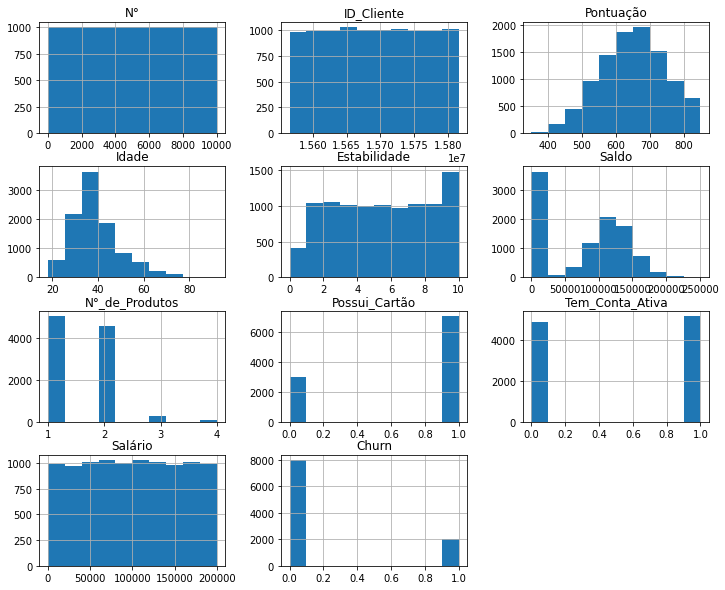

In [8]:
#Plotando uma distribuição de cada variável para obter uma visão geral e possíveis outliers(valores discrepantes)
dados.hist(figsize=(12,10));

In [9]:
#Analisando a variável Gênero
dados_plot= dados.groupby('Gênero').Churn.mean().reset_index()
dados_plot

,Gênero,Churn
0,Female,0.250715
1,Male,0.164559


## Pré-Processamento dos dados

In [10]:
#Eliminando variáveis irrelevantes
dados = dados.drop(columns = ['N°','ID_Cliente','Sobrenome'])
dados

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
#Identificando dados faltantes
dados.isnull().sum()

Pontuação          0
País               0
Gênero             0
Idade              0
Estabilidade       0
Saldo              0
N°_de_Produtos     0
Possui_Cartão      0
Tem_Conta_Ativa    0
Salário            0
Churn              0
dtype: int64

In [12]:
#Criando variáveis dependentes 'Churn' e independentes
y = dados['Churn']
x = dados.drop('Churn', axis = 1)
x

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77
9997,709,France,Female,36,7,0.00,1,0,1,42085.58
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52


In [13]:
#Criando variáveis numéricas
x_num = ['Pontuação', 'Saldo', 'Idade', 'Salário', 'Estabilidade']
x_num

['Pontuação', 'Saldo', 'Idade', 'Salário', 'Estabilidade']

In [14]:
#Criando variáveis categóricas
x_cat = list(set(x)-set(x_num))
x_cat
x_dummies=x[x_cat]
x_dummies

,Gênero,Tem_Conta_Ativa,País,N°_de_Produtos,Possui_Cartão
0,Female,1,France,1,1
1,Female,1,Spain,1,0
2,Female,0,France,3,1
3,Female,0,France,2,0
4,Female,1,Spain,1,1
...,...,...,...,...,...
9995,Male,0,France,2,1
9996,Male,1,France,1,1
9997,Female,1,France,1,0
9998,Male,0,Germany,2,1


## Processamento das Variáveis Categóricas

In [15]:
#Substituindo a variável sexo para 0 e 1
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['Gênero'] = le.fit_transform(x['Gênero']) 
x.head(10)

,Pontuação,País,Gênero,Idade,Estabilidade,Saldo,N°_de_Produtos,Possui_Cartão,Tem_Conta_Ativa,Salário
0,619,France,0,42,2,0.00,1,1,1,101348.88
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58
2,502,France,0,42,8,159660.80,3,1,0,113931.57
3,699,France,0,39,1,0.00,2,0,0,93826.63
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10
5,645,Spain,1,44,8,113755.78,2,1,0,149756.71
6,822,France,1,50,7,0.00,2,1,1,10062.80
7,376,Germany,0,29,4,115046.74,4,1,0,119346.88
8,501,France,1,44,4,142051.07,2,0,1,74940.50
9,684,France,1,27,2,134603.88,1,1,1,71725.73


In [16]:
#Dummificando variáveis categóricas com mais de 2 categorias
x_final = pd.get_dummies (data = x, columns=['País','N°_de_Produtos'] )
x_final

,Pontuação,Gênero,Idade,Estabilidade,Saldo,Possui_Cartão,Tem_Conta_Ativa,Salário,País_France,País_Germany,País_Spain,N°_de_Produtos_1,N°_de_Produtos_2,N°_de_Produtos_3,N°_de_Produtos_4
0,619,0,42,2,0.00,1,1,101348.88,1,0,0,1,0,0,0
1,608,0,41,1,83807.86,0,1,112542.58,0,0,1,1,0,0,0
2,502,0,42,8,159660.80,1,0,113931.57,1,0,0,0,0,1,0
3,699,0,39,1,0.00,0,0,93826.63,1,0,0,0,1,0,0
4,850,0,43,2,125510.82,1,1,79084.10,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,1,0,96270.64,1,0,0,0,1,0,0
9996,516,1,35,10,57369.61,1,1,101699.77,1,0,0,1,0,0,0
9997,709,0,36,7,0.00,0,1,42085.58,1,0,0,1,0,0,0
9998,772,1,42,3,75075.31,1,0,92888.52,0,1,0,0,1,0,0


## Processamento das Variáveis Numéricas

In [17]:
#Utilizando o método MiniMax para Padronizar(deixar na mesma escala de grandeza) as variáveis Numéricas Contínuas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_final[x_num] = scaler.fit_transform(x_final[x_num])
x_final[x_num]

,Pontuação,Saldo,Idade,Salário,Estabilidade
0,0.538,0.000000,0.324324,0.506735,0.2
1,0.516,0.334031,0.310811,0.562709,0.1
2,0.304,0.636357,0.324324,0.569654,0.8
3,0.698,0.000000,0.283784,0.469120,0.1
4,1.000,0.500246,0.337838,0.395400,0.2
...,...,...,...,...,...
9995,0.842,0.000000,0.283784,0.481341,0.5
9996,0.332,0.228657,0.229730,0.508490,1.0
9997,0.718,0.000000,0.243243,0.210390,0.7
9998,0.844,0.299226,0.324324,0.464429,0.3


## Particionando os Dados em Treino/Teste

In [18]:
# Separando em dados teste e treinamento 
from sklearn.model_selection import train_test_split 

x_treino, x_teste, y_treino,y_teste  = train_test_split(x_final, y, test_size = 0.25,random_state = 1)
x_treino

,Pontuação,Gênero,Idade,Estabilidade,Saldo,Possui_Cartão,Tem_Conta_Ativa,Salário,País_France,País_Germany,País_Spain,N°_de_Produtos_1,N°_de_Produtos_2,N°_de_Produtos_3,N°_de_Produtos_4
651,0.740,1,0.459459,0.7,0.000000,1,1,0.073855,1,0,0,1,0,0,0
6560,0.454,0,0.189189,0.1,0.000000,1,0,0.049459,1,0,0,0,1,0,0
8974,0.712,0,0.337838,0.1,0.000000,1,0,0.159771,0,0,1,0,1,0,0
2348,0.948,1,0.364865,0.3,0.514988,0,0,0.300730,1,0,0,1,0,0,0
5670,0.294,1,0.189189,0.8,0.000000,1,0,0.336796,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,0.542,1,0.391892,0.7,0.427916,1,1,0.333970,0,1,0,1,0,0,0
7813,0.668,0,0.608108,0.3,0.323820,1,0,0.348192,0,1,0,1,0,0,0
905,0.644,0,0.364865,0.9,0.000000,1,1,0.460124,1,0,0,1,0,0,0
5192,0.626,0,0.283784,0.8,0.000000,1,1,0.505835,1,0,0,0,1,0,0


# Avaliação 3 - Avaliação do Projeto de Ensino (Paper): Avaliação dos métodos e predição

## Modelo KNN

Modelo mais simples de aprendizado supervisionado, KNN ou k-nearest-neighbors ou k-vizinhos mais próximo, utiliza como base para prever as classes, os vizinhos mais próximo, ou seja, as observações mais próximas serão a base para prever essa nova observação.


Além disso, o algoritmo KNN, diferente dos outros algoritmos, tem seu poder computacional utilizado na amostra teste, quando precisamos prever uma nova observação e não para ajustar o modelo. Visto que as distâncias entre as observações só será calculada, quando incluímos uma nova observação.

In [19]:
#Ajustando o modelo KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=17)
knn.fit(x_treino, y_treino)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [20]:
#Previsão na amostra teste
resultado_knn = knn.predict(x_teste)
print (pd.crosstab(y_teste,resultado_knn, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1914   66  1980
1         361  159   520
All      2275  225  2500


In [21]:
#Matriz de Confusão
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, resultado_knn))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1980
           1       0.71      0.31      0.43       520

    accuracy                           0.83      2500
   macro avg       0.77      0.64      0.66      2500
weighted avg       0.81      0.83      0.80      2500



Observe que apesar de estar classificando bem os clientes que não deram Churn, classe 0, temos muitos falsos negativos no modelo (quando o modelo preve 0, mas o correto era 1). Ou seja, o modelo não consegue prever bem o Churn, que é o objetivo principal na análise.

## Modelo Random Forest

Random Forest é um método de aprendizado de máquina utilizado para problemas que envolvam classificação ou regressão. Podemos pensar em uma árvore de decisão como uma representação gráfica para um determinado processo de decisão. As árvores são formadas por nós, que armazenam informação (perguntas). O nó raiz é o nó que possui maior nível hierárquico e, a partir dele, ramificam-se os nós filhos. O nó que não possui filhos é conhecido como nó folha ou terminal.

In [28]:
# Importando o modelo que estamos usando 
from sklearn.ensemble import RandomForestClassifier
# Instanciando o modelo com 1000 árvores de decisão 
rf = RandomForestClassifier (n_estimators = 1000, random_state = 42) 
# Treinando o modelo nos dados de treinamento 
rf.fit (x_treino, y_treino);

In [23]:
#Previsão na amostra teste
y_rf = rf.predict(x_teste)
print (pd.crosstab(y_teste,y_rf, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1914   66  1980
1         266  254   520
All      2180  320  2500


O modelo de Random Forest conseguiu melhores resultados, mas ainda temos bastante falsos negativos. Tentaremos um modelo mais robusto e que não sofra tanta influência em amostras desbalanceada.

In [24]:
#Matriz de Confusão
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, y_rf))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1980
           1       0.79      0.49      0.60       520

    accuracy                           0.87      2500
   macro avg       0.84      0.73      0.76      2500
weighted avg       0.86      0.87      0.85      2500



## Modelo XGBoost

O XGBoost é um algoritmo de aprendizado de máquina, baseado em árvore de decisão e que utiliza uma estrutura de Gradient boosting.

Em problemas de previsão envolvendo dados não estruturados, como imagens, textos e vídeos, as redes neurais artificiais tendem a superar todos os outros algoritmos ou frameworks.

No entanto, quando se trata de dados estruturados/tabulares, algoritmos baseados em árvore de decisão são considerados os melhores da sua classe no momento.

In [25]:
#Importando as bibliotecas necessárias
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# ajuste do modelo nos dados de treino
xgb = XGBClassifier(learning_rate =0.1,
 n_estimators=1000,
 max_depth=6,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1.0,
 seed=27)
xgb.fit(x_treino, y_treino)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, n_estimators=1000, n_jobs=1,
              nthread=4, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1.0, seed=27,
              silent=None, subsample=0.8, verbosity=1)

In [26]:
#Previsão na amostra teste
preditos_xgb = xgb.predict(x_teste)
print (pd.crosstab(y_teste,preditos_xgb, rownames=['Real'], colnames=['Predito'], margins=True))

Predito     0    1   All
Real                    
0        1890   90  1980
1         255  265   520
All      2145  355  2500


In [27]:
#Matriz de Confusão
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_teste, preditos_xgb))

              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1980
           1       0.75      0.51      0.61       520

    accuracy                           0.86      2500
   macro avg       0.81      0.73      0.76      2500
weighted avg       0.85      0.86      0.85      2500



##Conclusão

O modelo XGBost e Random Forest se mostraram eficientes para prever a probabilidade do Churn dos clientes.

Usando o XGBoost alcançamos uma acurácia de 86%. Apesar do Random Forest ter uma acurácia de 87%, escolhemos o XGBoost como o melhor modelo. Pois o XGBoost foi o modelo que conseguiu prever melhor o Churn.

Observe que apesar da acurácia ser menor no XGBoost, as medidas referentes a classe 1 foi melhor no XGBoost. Lembre-se, a acurácia é uma medida geral do acerto do modelo, e o modelo XGBoost não conseguiu prever a classe 0 tão bem quanto o modelo Random Forest, por isso a acurácia foi menor.

Porém como o nosso objetivo era prever o Churn, o modelo XGBoost teve uma melhor performance nesse quesito.